In [ ]:
!pip install pandas numpy mlxtend matplotlib seaborn streamlit


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 56.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 KB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 85.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 KB 15.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 5.8 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19579 sha256=ae32fe6c5d4924d94339903e5bb8830034ac211aee4fb91b7b6c3a8ecc4c7615
  Stored in directory: /root/.cache/pip/wheels/2d/f0/a8/1094fca7a7e5d0d12ff56e0c64675d72aa5cc81a5fc200e849
Successfully built validators


In [ ]:
import pandas as pd

df = pd.read_csv('/Market_Basket_Optimisation.csv')

In [ ]:
# Drop duplicates and NaN values
df.drop_duplicates(inplace=True)
df.dropna(how='all', inplace=True)

# Convert the DataFrame into a list of lists
transactions = []
for i in range(0, len(df)):
    transactions.append([str(df.values[i,j]) for j in range(0, len(df.columns))])


In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Convert the list of lists into a one-hot encoded format
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Generate frequent itemsets and association rules
frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Print frequent itemsets and association rules
print(frequent_itemsets)
print(rules)


     support                           itemsets
0   0.113816                          (burgers)
1   0.103575                             (cake)
2   0.054879                        (champagne)
3   0.083865                          (chicken)
4   0.205217                        (chocolate)
..       ...                                ...
76  0.058744  (nan, ground beef, mineral water)
77  0.055845      (ground beef, spaghetti, nan)
78  0.067826         (milk, nan, mineral water)
79  0.050048             (milk, spaghetti, nan)
80  0.085024    (spaghetti, nan, mineral water)

[81 rows x 2 columns]
                    antecedents                 consequents  \
0                     (burgers)                       (nan)   
1                         (nan)                   (burgers)   
2                        (cake)                       (nan)   
3                         (nan)                      (cake)   
4                         (nan)                 (champagne)   
..                     

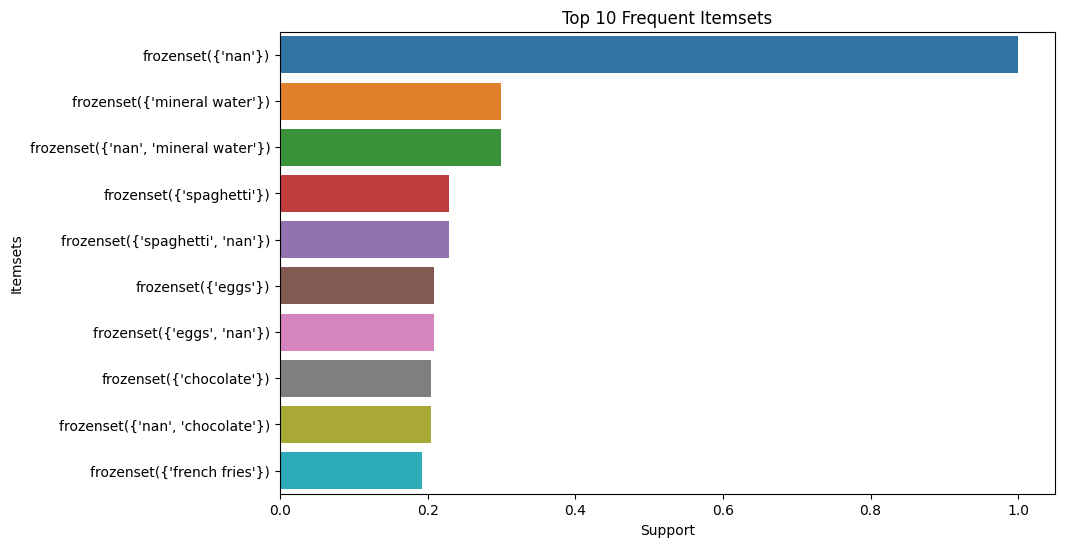

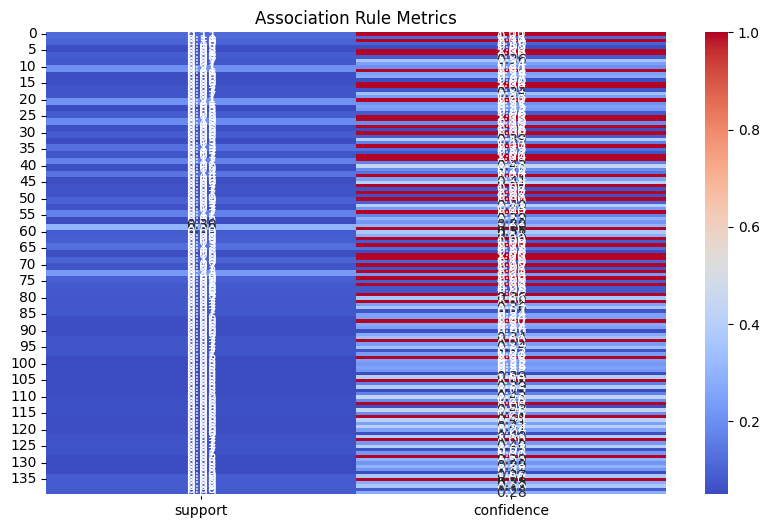

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart of top 10 most frequent itemsets
plt.figure(figsize=(10,6))
sns.barplot(x='support', y='itemsets', data=frequent_itemsets.nlargest(10, 'support'))
plt.title('Top 10 Frequent Itemsets')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.show()

# Heatmap of association rule support and confidence values
plt.figure(figsize=(10,6))
sns.heatmap(rules[['support', 'confidence']], cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Association Rule Metrics')
plt.show()


In [ ]:
import streamlit as st

# Define the input file uploader
uploaded_file = st.file_uploader("Choose a CSV file", type="csv")

# Define the minimum support and confidence sliders
min_support = st.slider('Minimum Support', 0.0, 1.0, 0.05, 0.01)
min_confidence = st.slider('Minimum Confidence', 0.0, 1.0, 0.5, 0.01)

# If a file has been uploaded, process it and display the results
if uploaded_file is not None:
    # Load the dataset
    df = pd.read_csv(uploaded_file)
    
    # Data Preprocessing
    df.drop_duplicates(inplace=True)
    df.dropna(how='all', inplace=True)
    transactions = []
    for i in range(0, len(df)):
        transactions.append([str(df.values[i,j]) for j in range(0, len(df.columns))])
    
    # Apriori Algorithm Implementation
    te = TransactionEncoder()
    te_ary = te.fit(transactions).transform(transactions)
    df = pd.DataFrame(te_ary, columns=te.columns_)
    frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=min_confidence)
    
    # Results Visualization
    st.subheader('Top 10 Frequent Item')


  command:

    streamlit run /usr/local/lib/python3.9/dist-packages/ipykernel_launcher.py [ARGUMENTS]
2023-03-30 03:44:16.049 
  command:

    streamlit run /usr/local/lib/python3.9/dist-packages/ipykernel_launcher.py [ARGUMENTS]
